In [1]:
import numpy as np

class MyData:
    def __init__(self):
        pass

    def get_data(self):
        data = np.genfromtxt("./data/point.csv", delimiter = ',')
        return data

data = MyData()
point = data.get_data()
print(point.shape)

x = point[0]
y = point[1]
print(x.shape)

(2, 100)
(100,)


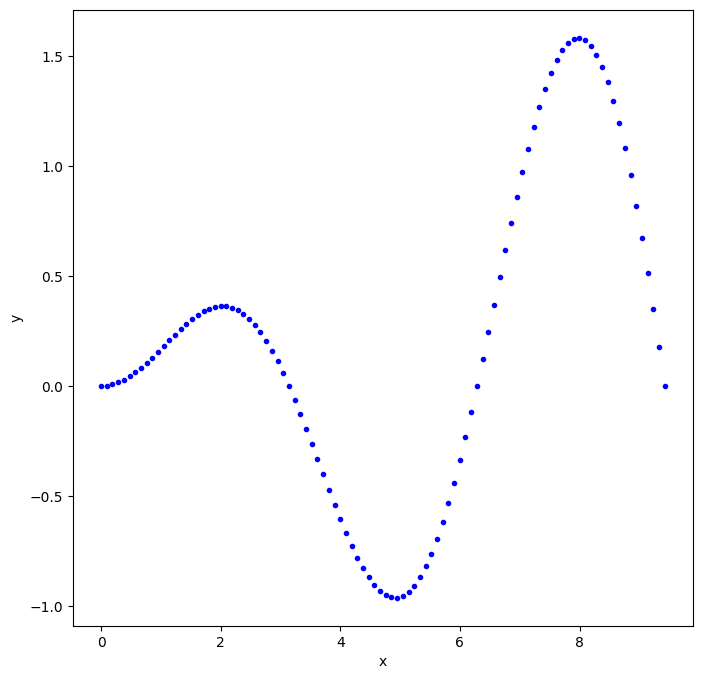

In [2]:
import matplotlib.pyplot as plt

class MyPlot:
    def __init__(self):
        self.fig_size = (8,8)
    
    def plot_point(self, x, y1, y2 = None):
        plt.figure(figsize = self.fig_size)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.scatter(x, y1, marker = '.', color = 'blue')
        if y2 is not None:
            plt.plot(x, y2, color = 'red')
        pass

plot = MyPlot()
plot.plot_point(x, y)


# p값에 따라 어떤 곡선이 나오는지 확인하는것이므로, 

# theta를 찾는것은 최소제곱해를 통한 연산 한번이다.

In [31]:
class MyUtil:
    def __init__(self):
        self.feature = None
        pass
    
    def get_feature(self, x, p):
        self.feature = np.column_stack([x ** j for j in range(p)])
        
    def compute_regression_polynomial(self, x, y, p = 1, alpha = 0):
        self.get_feature(x, p)
        x = x.reshape(-1, 1)
        y = y.reshape(-1, 1)
        theta = self.find_theta(y)
        f_hat, loss = self.get_loss(y, theta)
        return f_hat, loss

    def find_fhat(self, theta):
        f_hat = self.feature @ theta
        return f_hat
    
    def get_loss(self, label, theta):
        f_hat = self.find_fhat(theta)
        res = label - f_hat
        loss = (1 / (2 * len(label)) * (res.T @ res))
        return f_hat, loss
    
    def find_theta(self, label):
        theta = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ label
        theta = theta.reshape(-1, 1)
        return theta


model = MyUtil()
y11 , loss11 = model.compute_regression_polynomial(x, y, p=1)
y12, loss12 = model.compute_regression_polynomial(x, y, p=2)
y13, loss13 = model.compute_regression_polynomial(x, y, p=4)
y14, loss14 = model.compute_regression_polynomial(x, y, p=8)
y15, loss15 = model.compute_regression_polynomial(x, y, p=32)


        

/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2210/1971980553.py:28: RuntimeWarning: divide by zero encountered in matmul
  theta = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ label
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2210/1971980553.py:28: RuntimeWarning: overflow encountered in matmul
  theta = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ label
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2210/1971980553.py:28: RuntimeWarning: invalid value encountered in matmul
  theta = (np.linalg.inv(self.feature.T @ self.feature) @ self.feature.T) @ label
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2210/1971980553.py:18: RuntimeWarning: divide by zero encountered in matmul
  f_hat = self.feature @ theta
/var/folders/vf/d0gygbv5527dd2h9xypg_1zm0000gn/T/ipykernel_2210/1971980553.py:18: RuntimeWarning: overflow encountered in matmul
  f_hat = self.feature @ theta
/var/folders/vf/d0gygbv5527dd2

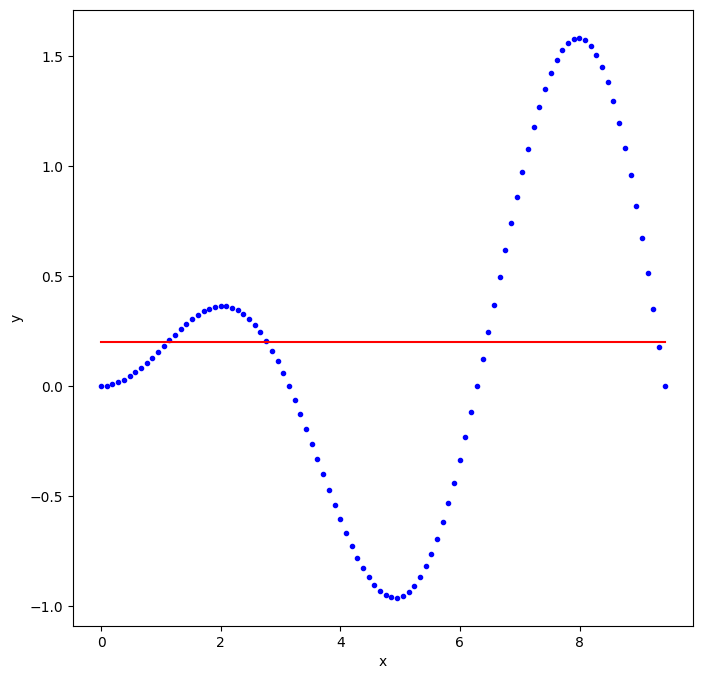

In [21]:
plot.plot_point(x, y, y11)

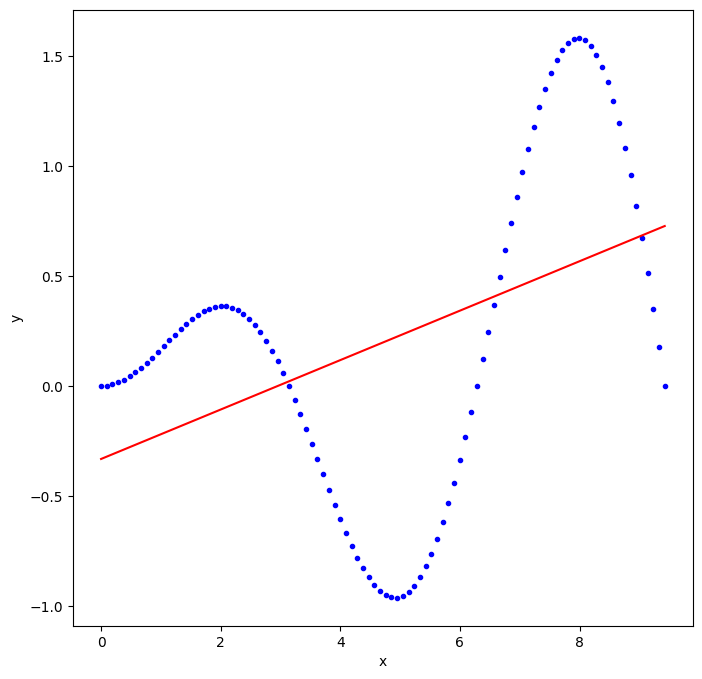

In [22]:
plot.plot_point(x, y, y12)

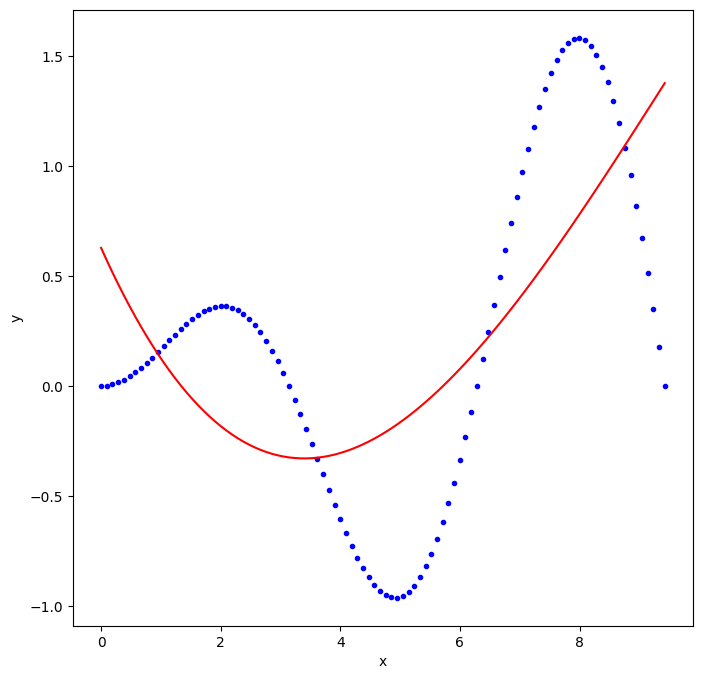

In [27]:
plot.plot_point(x, y, y13)

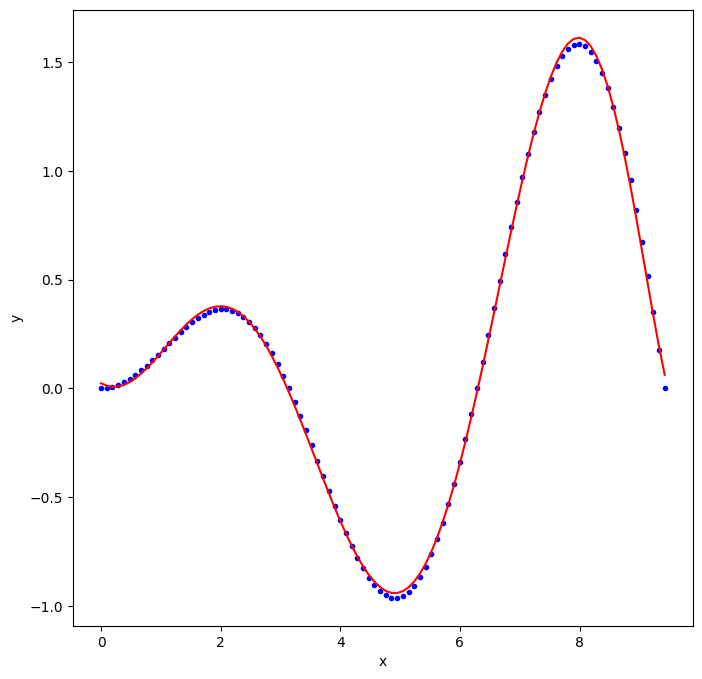

In [32]:
plot.plot_point(x, y, y14)

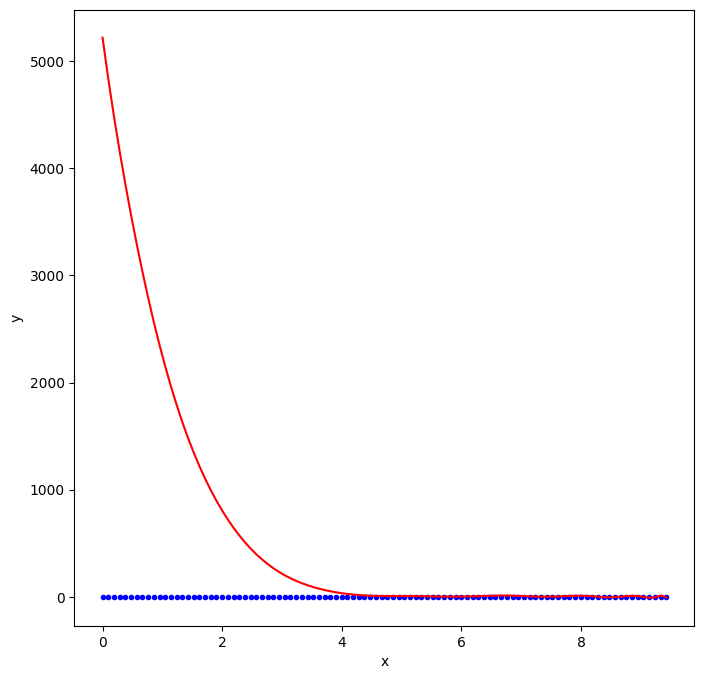

In [25]:
plot.plot_point(x, y, y15)